# Agent Based Models Review/Practice

> Computational Analysis of Social Complexity

**Prerequisites**

- ABM
- Shelling segregation model

**Outcomes**

- Recall key components of ABM
- Review additional example of ABM in Julia


**References**

- https://proceedings.scipy.org/articles/Majora-7b98e3ed-009.pdf
- https://juliadynamics.github.io/Agents.jl/stable/
- https://juliadynamics.github.io/AgentsExampleZoo.jl/dev/examples/wealth_distribution/

## Agent Based Models

- Agent based models are...
    - An approximation to some complex system (a model)
    - Used in various fields including biology, epidemiology, economics, etc.
    - Composed of three key elements: (1) Agents (2) Environment (3) Rules

## Shelling Segregation Model

- Recall the Schelling segregation model...
- Agents: individuals/families seeking a home in a neighborhood. Have a type and hapiness. Agents are happy if least $N$ of their neighbors are same type
- Environment: grid of "lots" or homes where agents can live
- Rules: All unhappy agents move to a new random home in the environment

### Shelling Takeaways

- Very simplistic view of agents (people) and decision making criterion (rules)
- Agents only considered immediate neighbors when deciding to move (locality)
- Simplistic, local behavior led to stark aggregate results: segregation of neighborhoods into agent types
- Agents.jl implementation very straightforward: `struct` to represent agent, `struct` (Agents.jl defined) to represent environment, `function` to represent rules for single agent

## Plan today

- See example of second model
- Break into groups and study example models from the [Agents.jl model zoo](https://juliadynamics.github.io/AgentsExampleZoo.jl/dev/)
    - Present model your group studied

## Money Model

- Agents:
    - $N$ Agents
    - All start with 1.0 wealth
- Environment: none -- they just exist ;)
- Rules:
    - If agent has at least 1.0 wealth, gives 1.0 wealth to another agent
    - If agent has 0 wealth, does nothing

### Agents

In [1]:
# import Pkg
# Pkg.activate(".")
# Pkg.instantiate()

In [1]:
using Agents, Random, DataFrames

@agent struct MoneyAgent(NoSpaceAgent)
    wealth::Int
end

### Rules

In [2]:
function agent_step!(agent, model)
    if agent.wealth == 0
        return
    end
    recipient = random_agent(model)
    agent.wealth -= 1
    recipient.wealth += 1
end

agent_step! (generic function with 1 method)

### Model

In [3]:
function money_model(; N = 100)
    m = ABM(MoneyAgent; agent_step!)
    for _ in 1:N
        add_agent!(m, 1)
    end
    return m
end

money_model()

StandardABM with 100 agents of type MoneyAgent
 agents container: Dict
 space: nothing (no spatial structure)
 scheduler: fastest

### Simulation

In [4]:
m = money_model(N=2000)
adata = [:wealth]
df, _ = run!(m, 10; adata)

(22000×3 DataFrame
   Row │ time   id     wealth 
       │ Int64  Int64  Int64  
───────┼──────────────────────
     1 │     0      1       1
     2 │     0      2       1
     3 │     0      3       1
     4 │     0      4       1
     5 │     0      5       1
     6 │     0      6       1
     7 │     0      7       1
     8 │     0      8       1
     9 │     0      9       1
    10 │     0     10       1
    11 │     0     11       1
   ⋮   │   ⋮      ⋮      ⋮
 21991 │    10   1991       1
 21992 │    10   1992       0
 21993 │    10   1993       1
 21994 │    10   1994       1
 21995 │    10   1995       2
 21996 │    10   1996       1
 21997 │    10   1997       1
 21998 │    10   1998       1
 21999 │    10   1999       1
 22000 │    10   2000       0
            21979 rows omitted, 0×0 DataFrame)

In [5]:
using CairoMakie

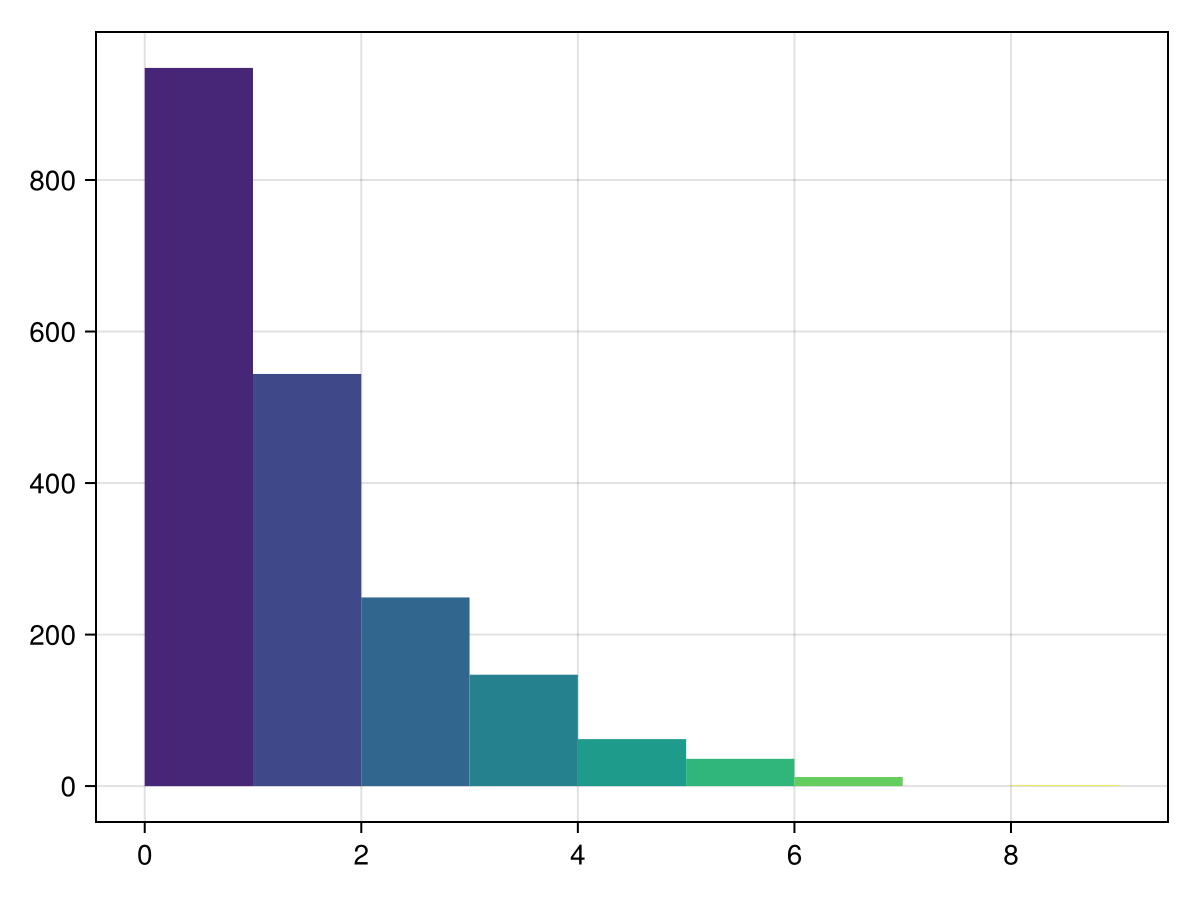

In [6]:
hist(
    filter(x -> x.time == 10, df).wealth;
    bins = collect(0:9),
    color = cgrad(:viridis)[28:28:256],
)

- Above we see the famous "power law" pattern
- This is a common result in many areas of economics: that activity or wealth is concentrated in the very few (the 1%) 
    - References: https://pubs.aeaweb.org/doi/pdf/10.1257/jep.30.1.185, https://www.sciencedirect.com/science/article/abs/pii/S0378437197002173, https://www.theguardian.com/commentisfree/2011/nov/11/occupy-movement-wealth-power-law-distribution

## Money Model with space

- Let's expand our environment to a 2d-grid and only allow sharing wealth amongst neighbors
- Changes relative to previous setup:
    - Agents now have a position
    - Environment is 2d `GridSpace`
    - Agents randomly pick a neighbor to give money to

In [7]:
@agent struct WealthInSpace(GridAgent{2})
    wealth::Int
end

In [ ]:
function agent_step!(agent::WealthInSpace, model)
    if agent.wealth == 0
        return
    end

    recipient = rand(collect(nearby_agents(agent, model)))
    agent.wealth -= 1
    recipient.wealth += 1
end

agent_step! (generic function with 2 methods)

In [9]:
function money_model_2d(; dims = (25, 25))
    space = GridSpace(dims, periodic = true)
    model = ABM(WealthInSpace, space; scheduler = Schedulers.Randomly(), agent_step! = agent_step!)

    fill_space!(model, 1)
    return model
end

money_model_2d (generic function with 1 method)

In [10]:
m2d = money_model_2d()
adata2d = [:wealth, :pos]
df2d, _ = run!(m2d, 10; adata=adata2d)

(6875×4 DataFrame
  Row │ time   id     wealth  pos      
      │ Int64  Int64  Int64   Tuple…   
──────┼────────────────────────────────
    1 │     0      1       1  (1, 1)
    2 │     0      2       1  (2, 1)
    3 │     0      3       1  (3, 1)
    4 │     0      4       1  (4, 1)
    5 │     0      5       1  (5, 1)
    6 │     0      6       1  (6, 1)
    7 │     0      7       1  (7, 1)
    8 │     0      8       1  (8, 1)
    9 │     0      9       1  (9, 1)
   10 │     0     10       1  (10, 1)
   11 │     0     11       1  (11, 1)
  ⋮   │   ⋮      ⋮      ⋮        ⋮
 6866 │    10    616       0  (16, 25)
 6867 │    10    617       0  (17, 25)
 6868 │    10    618       1  (18, 25)
 6869 │    10    619       0  (19, 25)
 6870 │    10    620       1  (20, 25)
 6871 │    10    621       0  (21, 25)
 6872 │    10    622       1  (22, 25)
 6873 │    10    623       2  (23, 25)
 6874 │    10    624       2  (24, 25)
 6875 │    10    625       0  (25, 25)
                      6854 r

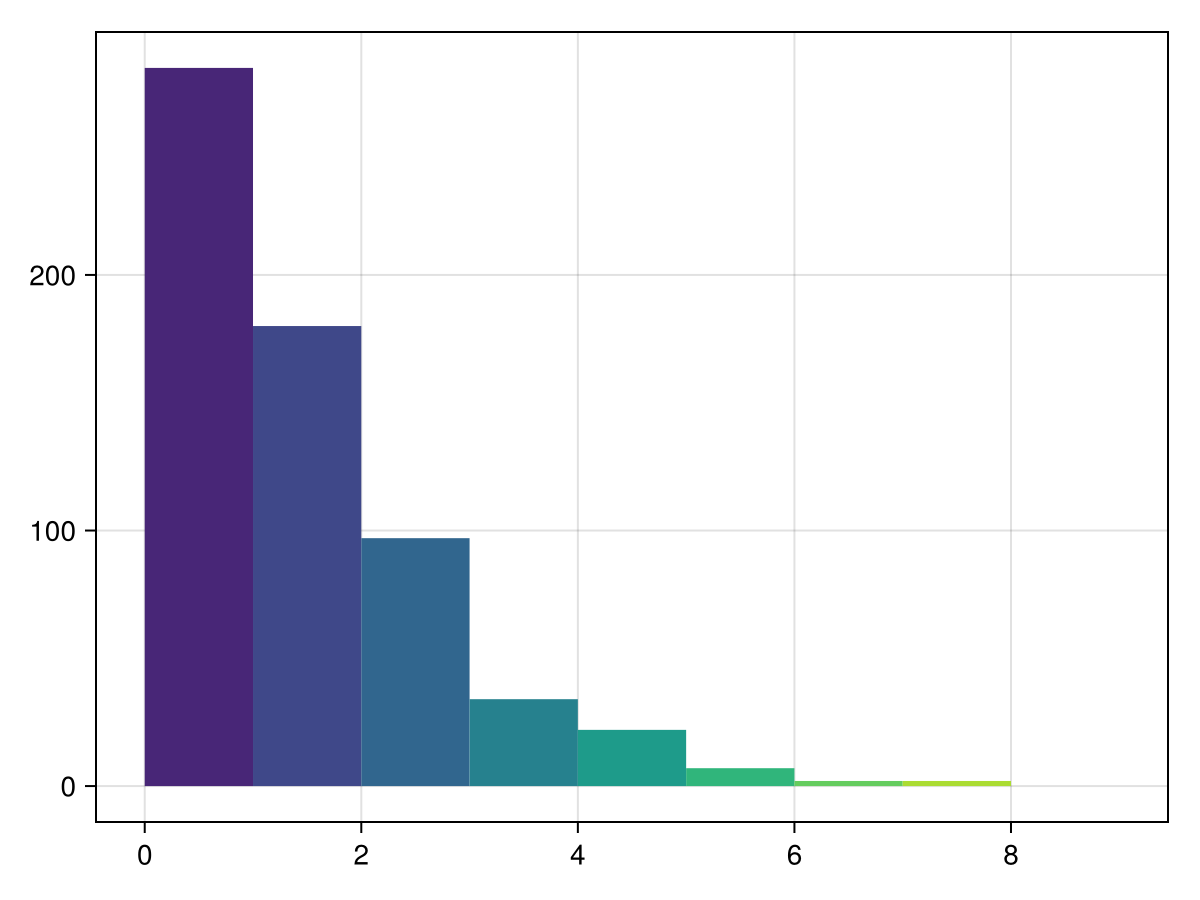

In [11]:
hist(
    filter(x -> x.time == 10, df2d).wealth;
    bins = collect(0:9),
    color = cgrad(:viridis)[28:28:256],
)

- Still a power law... very pervasive!

In [ ]:
function make_heatmap(model, df, T=maximum(df.step))
    df_T = filter(x -> x.time == T, df)

    x = combine(groupby(df_T, :pos), :wealth => sum)
    arr = zeros(Int, size(getfield(model, :space)))

    for r in eachrow(x)
        arr[r.pos...] += r.wealth_sum
    end

    figure = Figure(; size = (600, 450))
    hmap_l = figure[1, 1] = Axis(figure, title="T= $T")
    hmap = heatmap!(hmap_l, arr; colormap = cgrad(:default))
    cbar = figure[1, 2] = Colorbar(figure, hmap; width = 30)
    return figure
end

make_heatmap (generic function with 2 methods)

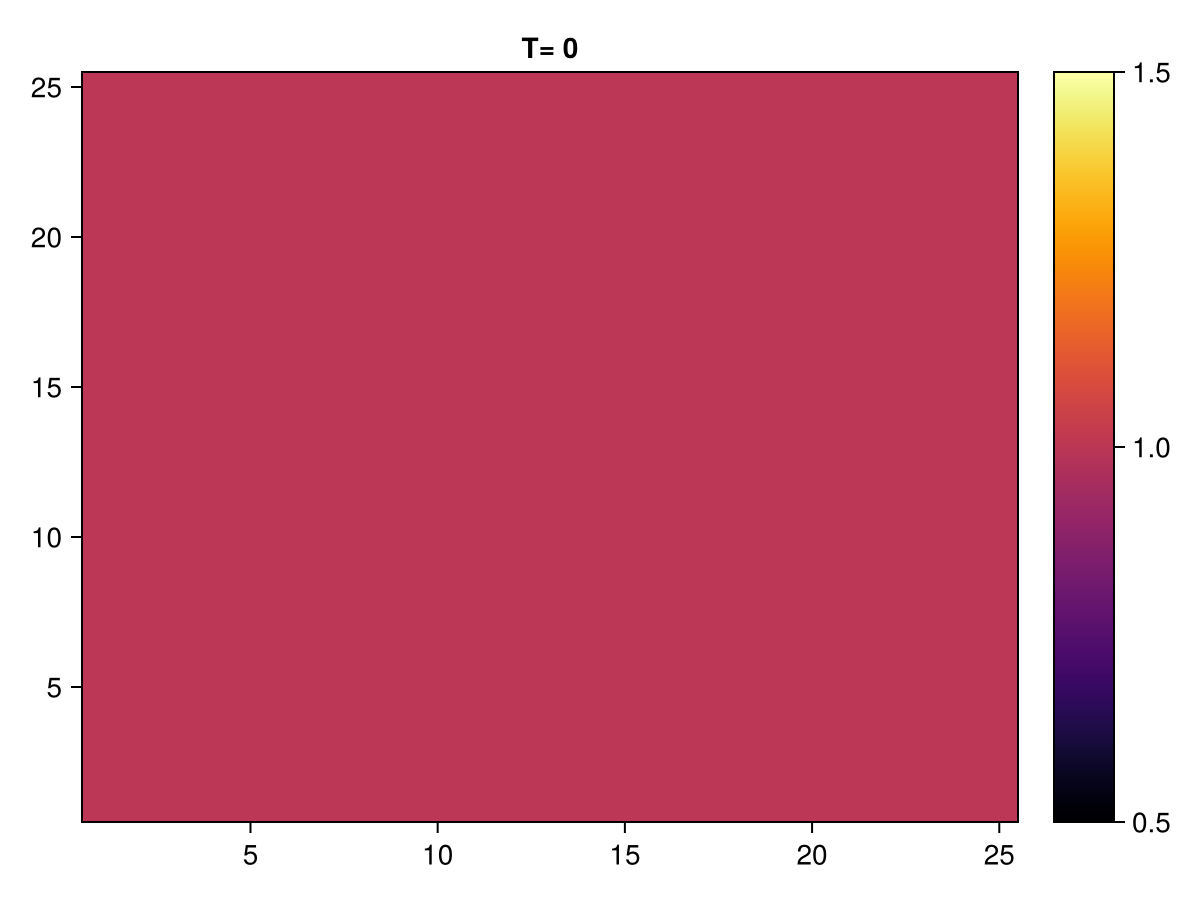

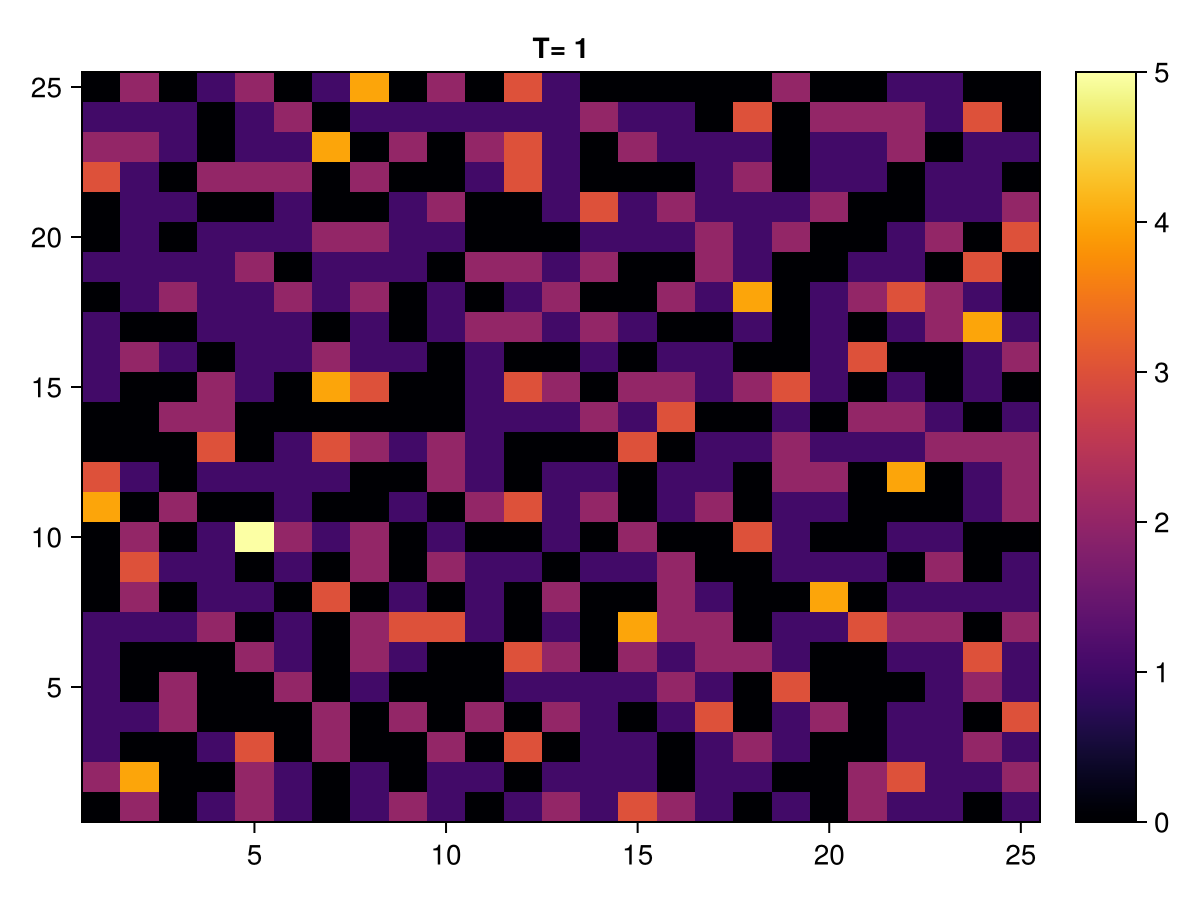

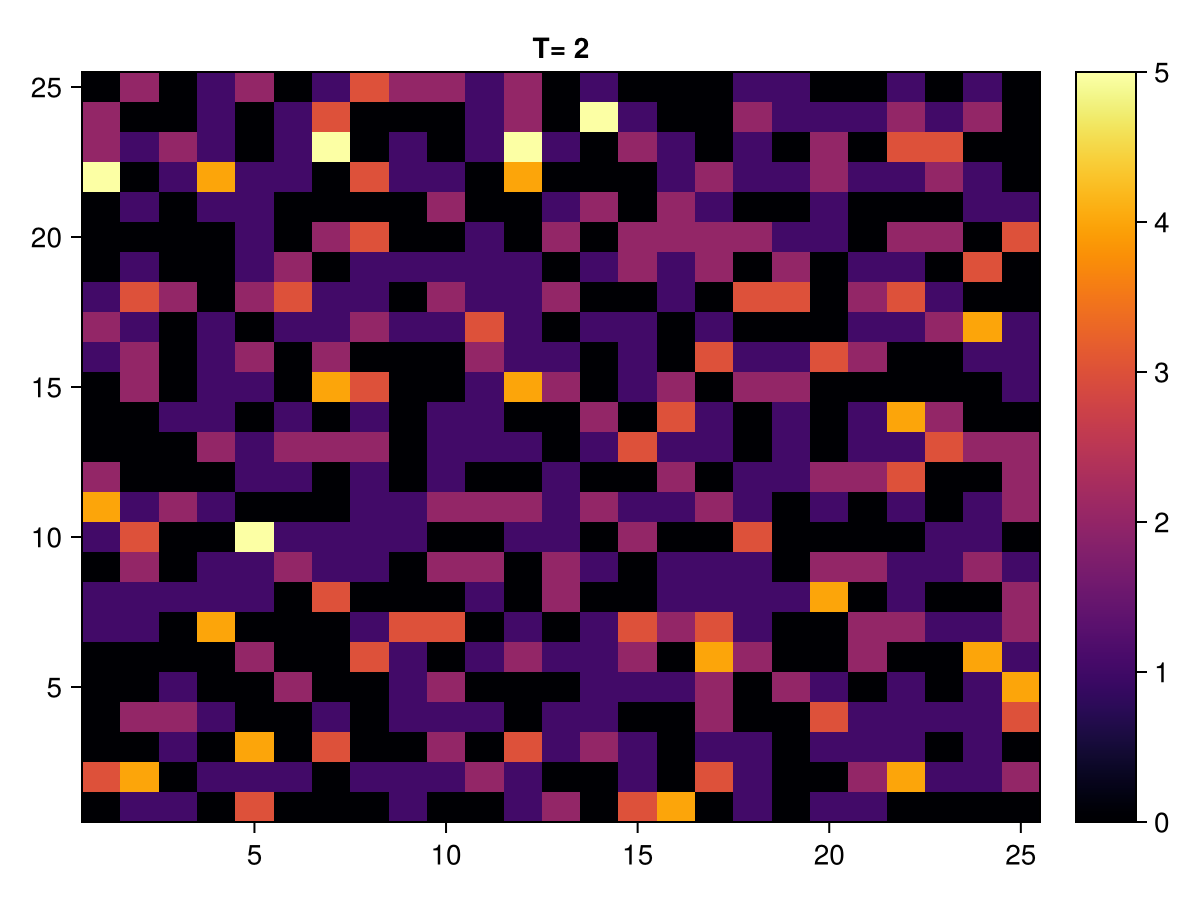

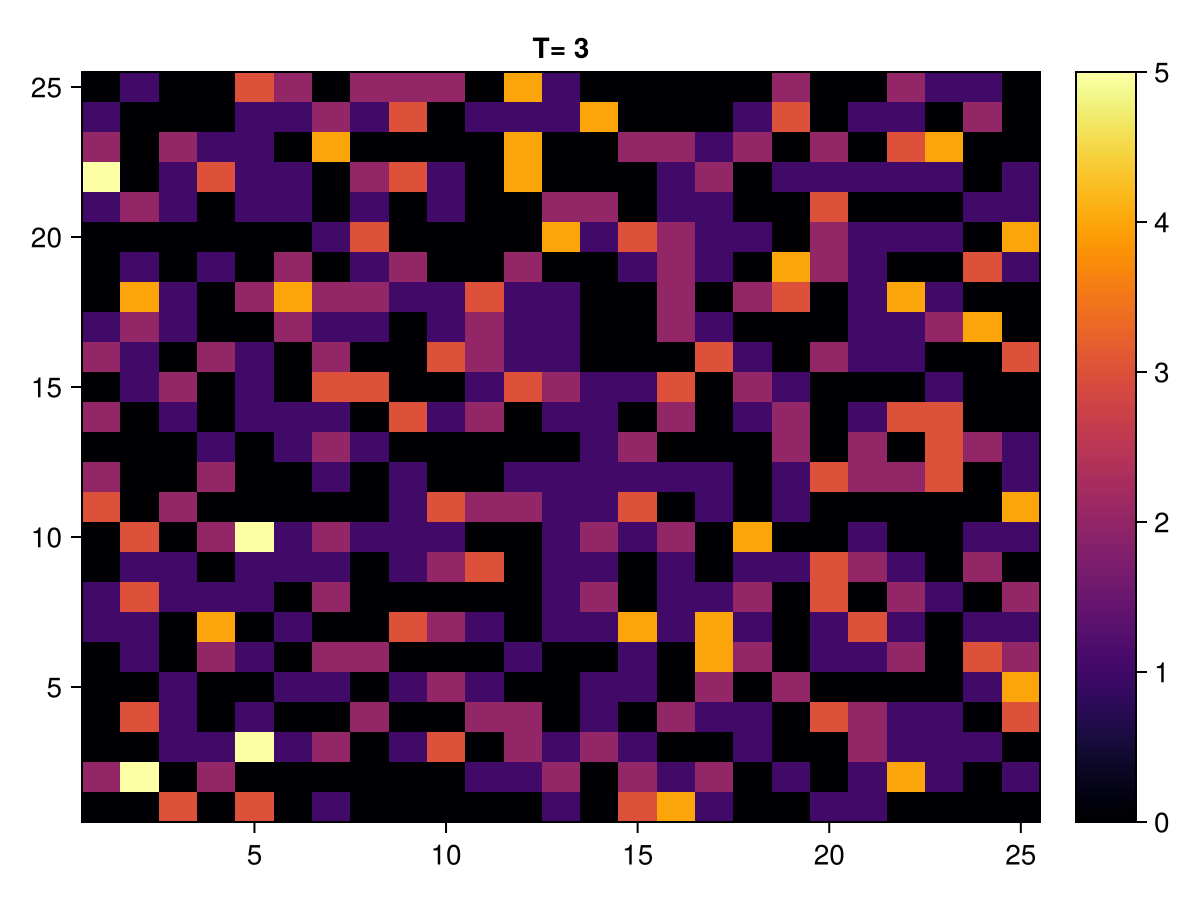

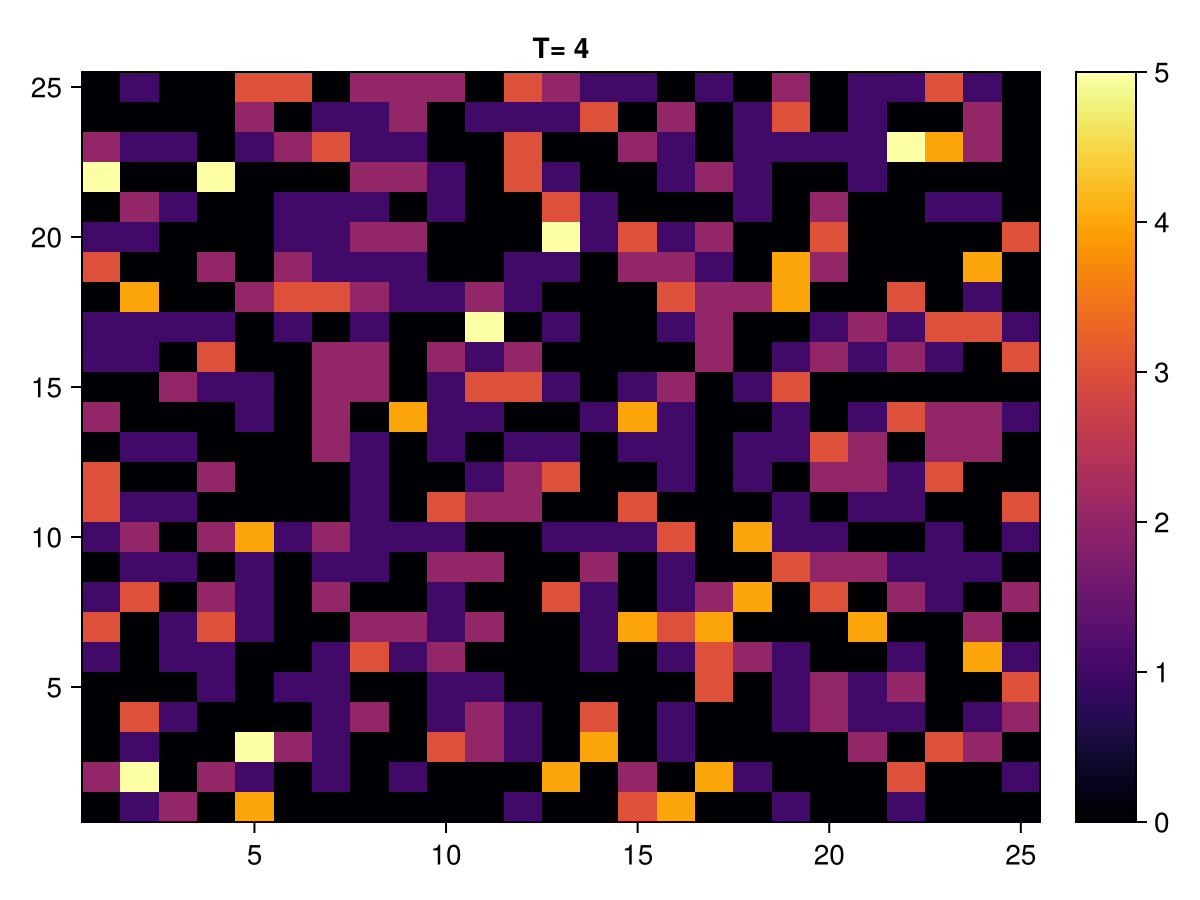

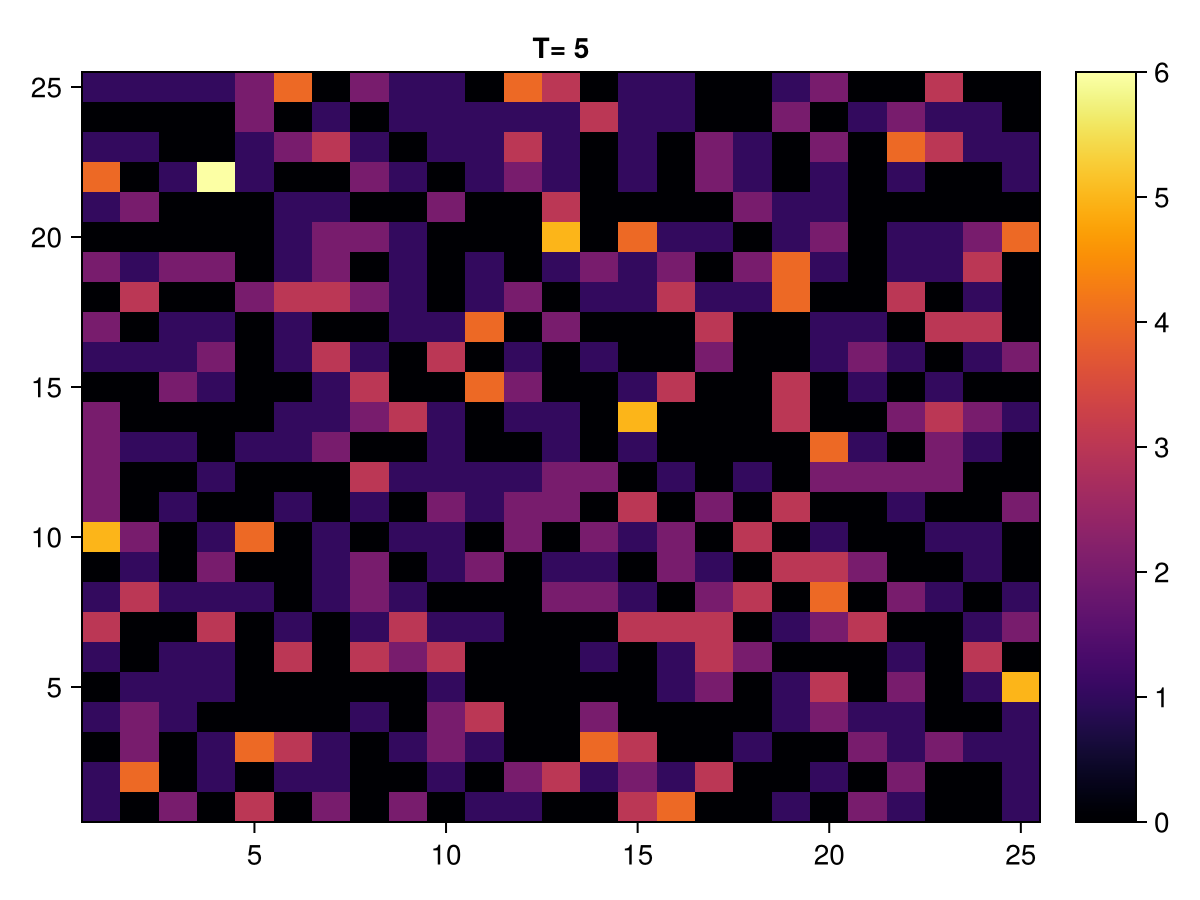

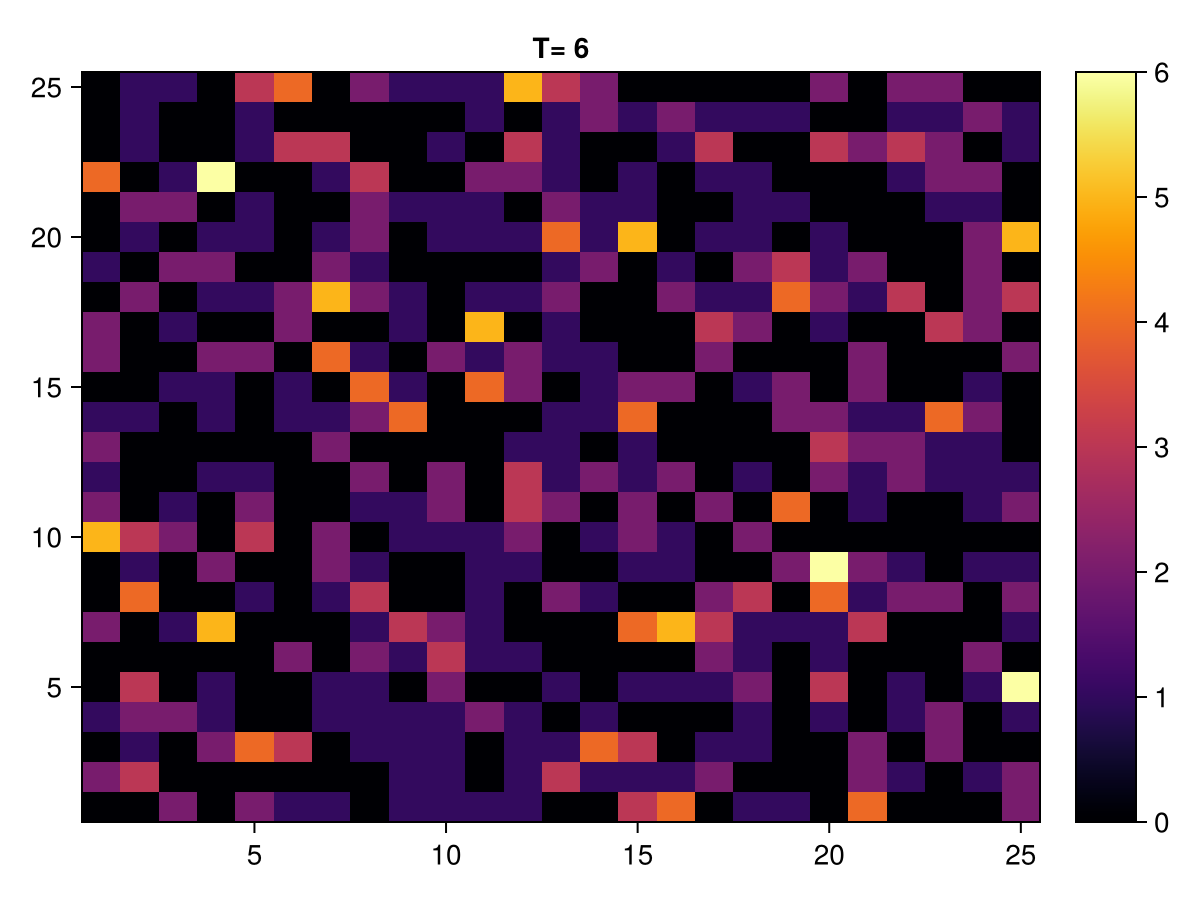

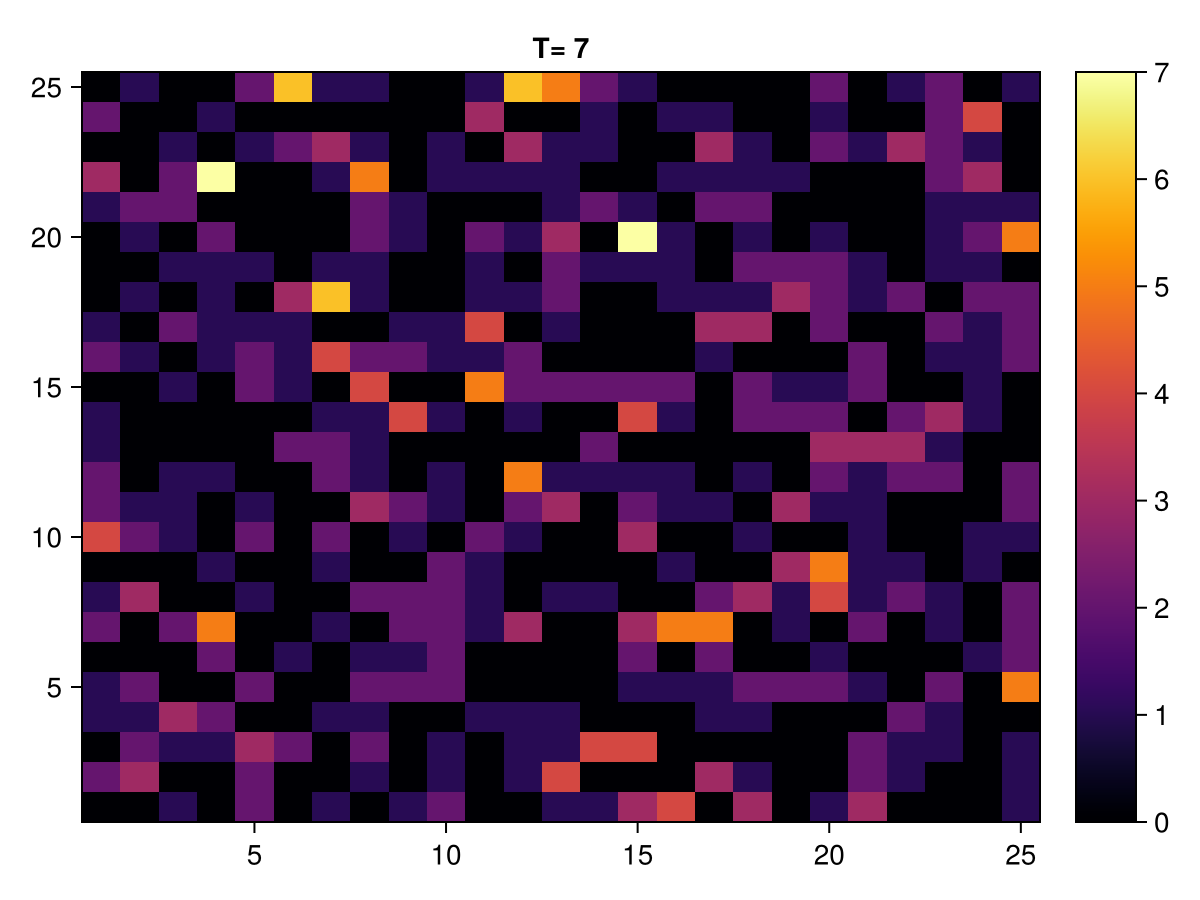

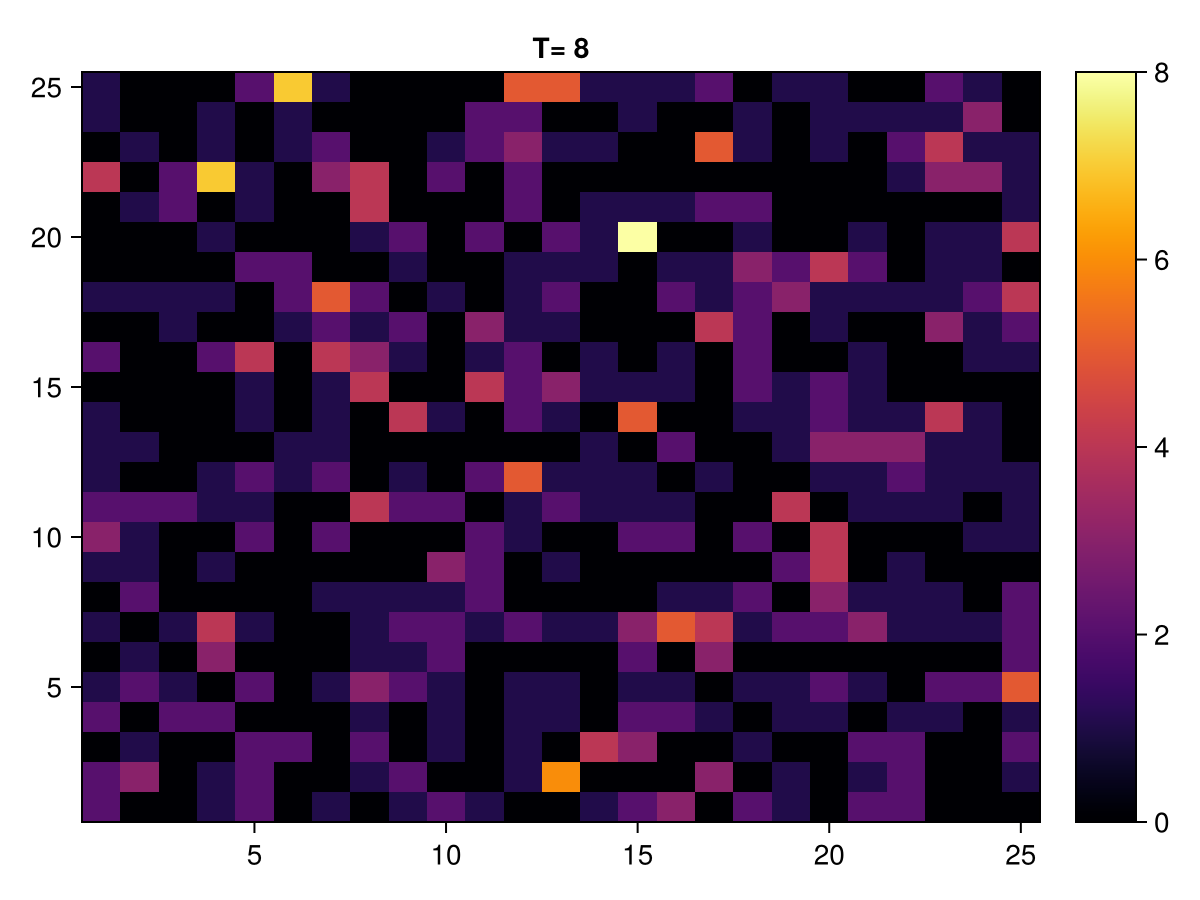

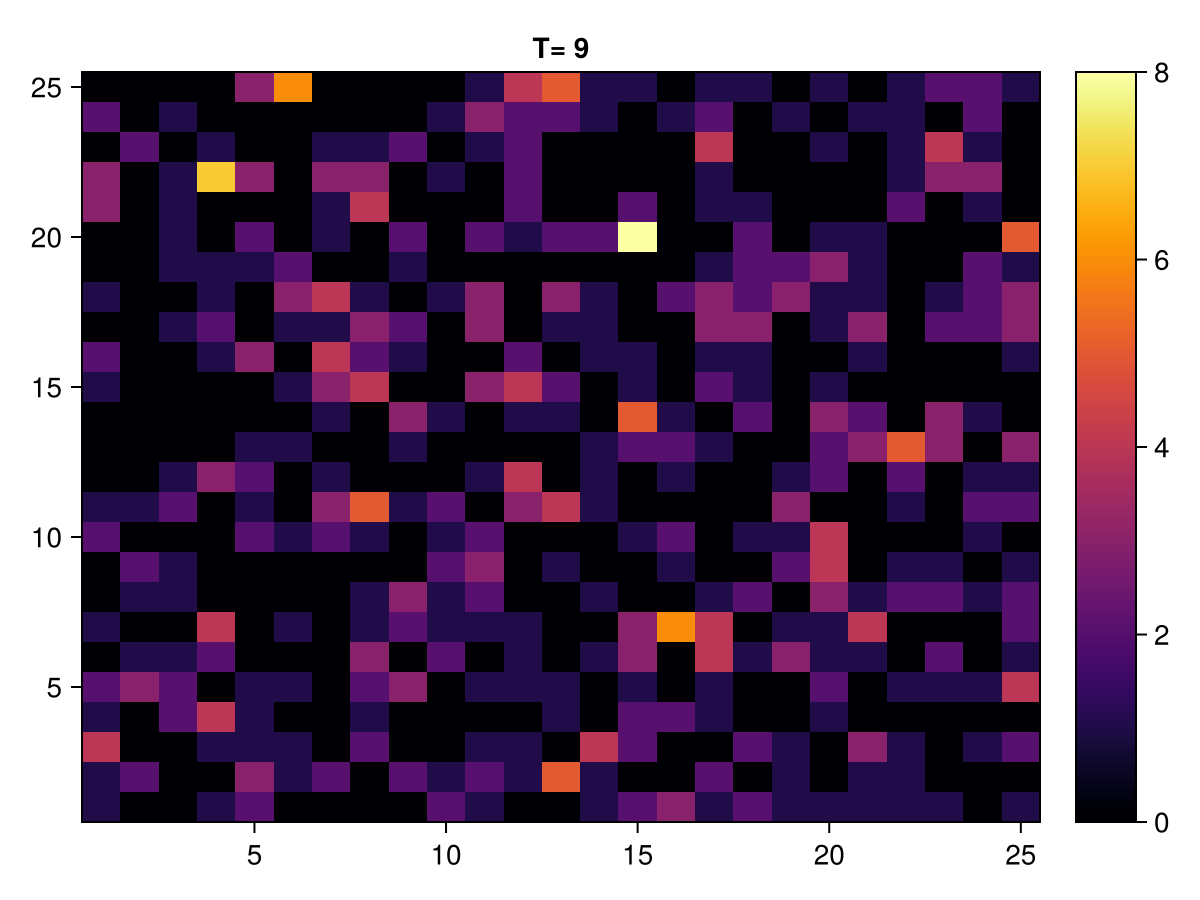

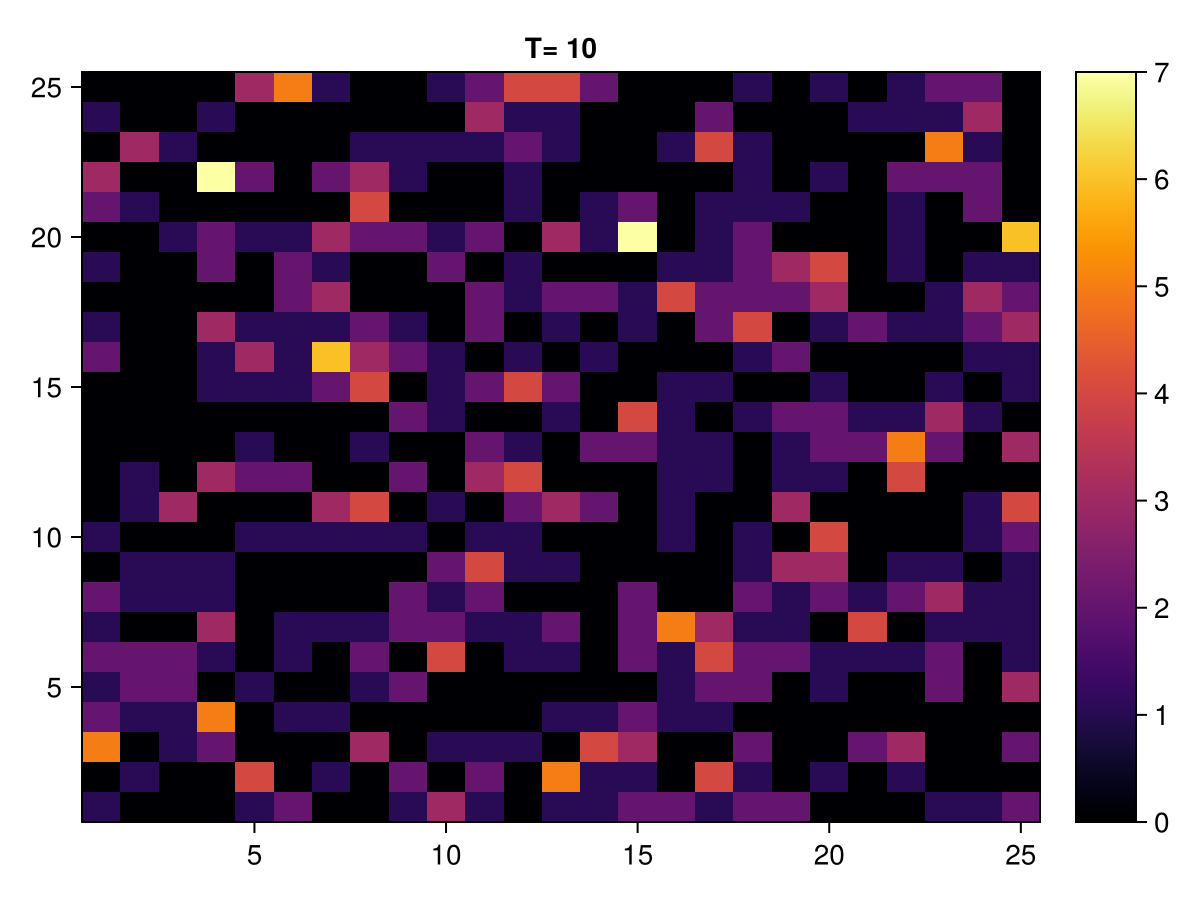

In [13]:
for t in 0:10
    display(make_heatmap(m2d, df2d, t))
end